In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics


In [2]:
data = pd.read_csv("framingham_heart_study.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
data.shape

(4240, 16)

In [6]:
pd.isnull(data).values.any()

True

In [7]:
pd.isnull(data).values.sum()

645

In [8]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
new_data = data.fillna(method='ffill', axis=1)

In [10]:
new_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

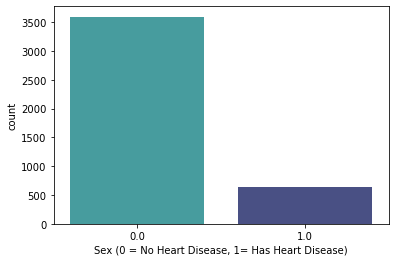

In [11]:
# plotting target classes
# sns.distplot(new_data["TenYearCHD"], rug=True)
sns.countplot(x='TenYearCHD', data=new_data, palette="mako_r")
plt.xlabel("Sex (0 = No Heart Disease, 1= Has Heart Disease)")
plt.show()

In [126]:
# Percentage of each target class
countNegative = len(new_data[new_data.TenYearCHD == 0])
countPositive = len(new_data[new_data.TenYearCHD == 1])
print("Percentage of Negative Patients: {:.2f}%".format((countNegative / (len(new_data.TenYearCHD))*100)))
print("Percentage of Positive Patients: {:.2f}%".format((countPositive / (len(new_data.TenYearCHD))*100)))

Percentage of Negative Patients: 84.81%
Percentage of Positive Patients: 15.19%


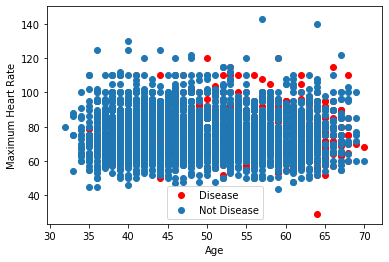

In [127]:
plt.scatter(x=new_data.age[new_data.TenYearCHD==1], y=new_data.heartRate[(new_data.TenYearCHD==1)], c="red")
plt.scatter(x=new_data.age[new_data.TenYearCHD==0], y=new_data.heartRate[(new_data.TenYearCHD==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [128]:
x = new_data.drop(["TenYearCHD"], axis=1)
y = data["TenYearCHD"]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [156]:
rf = RandomForestClassifier(random_state = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [157]:
acc = rf.score(X_test,y_test)*100
# accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 83.88%


In [161]:
# Gradient boosting
AdaBoost = AdaBoostClassifier(base_estimator=rf, n_estimators=400, learning_rate=1, random_state=100)
boostmodel = AdaBoost.fit(X_train, y_train)
y_pred = boostmodel.predict(X_test)
predictions = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

In [162]:
print("Accuracy:",predictions*100, '%')
print("Precision:",precision)
print("Recall",recall)

Accuracy: 84.04088050314465 %
Precision: 0.6666666666666666
Recall 0.03864734299516908
